In [249]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
with open('output_new/levenshtein_500.json','r') as out:
    for line in out:
        data_1 = json.loads(line)
        
with open('output_new/levenshtein_soundex_500.json','r') as out:
    for line in out:
        data_2 = json.loads(line)
        
with open('output_new/levenshtein_metaphone_500.json','r') as out:
    for line in out:
        data_3 = json.loads(line)

In [251]:
levenshtein = pd.DataFrame(data_1)
levenshtein_soundex = pd.DataFrame(data_2)
levenshtein_metaphone = pd.DataFrame(data_3)

In [252]:
levenshtein.token.count(),levenshtein_soundex.token.count(),levenshtein_metaphone.token.count()

(501, 501, 501)

In [253]:
def compute_analysis(ds_1, part):
    candidates = ds_1.query('candidates_len > 0')
    is_correct = candidates.query('is_correct == True')
    
    precision = float(is_correct.token.count()) / float(candidates.candidates_len.sum())
    recall = float(is_correct.token.count()) / float(ds_1.token.count())
    
    mean = candidates.candidates_len.mean()
    maximum = candidates.candidates_len.max()
    
    result = {
        "part": part,
        "precision": precision,
        "recall": recall,
        "mean": mean,
        "max": maximum
    }
    
    return result

In [254]:
# combine analysis
combine_results = []
combine_results.append(compute_analysis(levenshtein, "levenshtein"))
combine_results.append(compute_analysis(levenshtein_soundex, "levenshtein_soundex"))
combine_results.append(compute_analysis(levenshtein_metaphone, "levenshtein_metaphone"))

combine_results = pd.DataFrame(combine_results)
combine_results[['part','precision','recall','max', 'mean']]

,part,precision,recall,max,mean
0,levenshtein,0.006074,0.269461,364,46.016563
1,levenshtein_soundex,0.051597,0.209581,32,4.452954
2,levenshtein_metaphone,0.055970,0.179641,22,3.765808


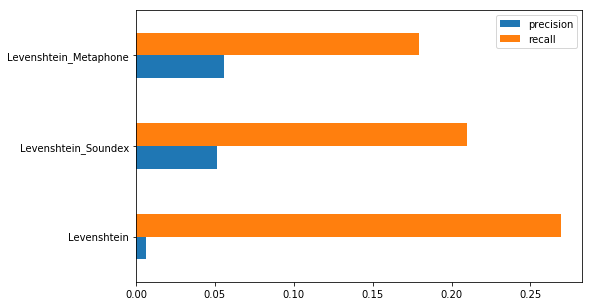

In [255]:
rects = combine_results[['part','precision', 'recall']].plot(kind='barh', legend=True, figsize=(8, 5));
rects.set_yticklabels(('Levenshtein','Levenshtein_Soundex','Levenshtein_Metaphone'))
plt.show()

In [256]:
iscorrect_1 = levenshtein.query('is_correct==True').token.count()
iscorrect_2 = levenshtein_soundex.query('is_correct==True').token.count()
iscorrect_3 = levenshtein_metaphone.query('is_correct==True').token.count()

iscorrect_1, iscorrect_2, iscorrect_3

(135, 105, 90)

In [257]:
levenshtein[:10][['token','canonical','candidates','candidates_len']]

,token,canonical,candidates,candidates_len
0,pix,pictures,"[aax, ai, aia, aic, aid, aif, aih, aik, ail, a...",44
1,comming,coming,"[bamming, bombing, booming, bumming, caaming, ...",22
2,tomoroe,tomorrow,"[pomorze, tofore, tomolo, tomorn, tomorrow, to...",9
3,dang,dang,"[aag, aani, adan, adana, afg, ag, alang, alg, ...",26
4,effin,fucking,"[affine, affing, affix, alfin, baffin, beefin,...",21
5,greenbay,greenbay,"[greenaway, greenback, green-bag, greenbank, g...",14
6,nd,and,"[2, &c, 2d, 2nd, 3d, ad, and, bd, cd, cnd, d, ...",37
7,hve,have,"[aae, abe, ace, ade, ae, age, ahe, aye, ake, a...",42
8,huyy,huyy,"[audy, augy, buy, buys, buoy, bury, busy, cuya...",72
9,effin,fucking,"[affine, affing, affix, alfin, baffin, beefin,...",21


In [258]:
levenshtein_soundex[:10][['token','canonical','candidates','candidates_len']]

,token,canonical,candidates,candidates_len
0,pix,pictures,"[pax, pbx, pex, pfx, pic, pig, pik, pis, pix]",9
1,comming,coming,"[caaming, chiming, chumming, coaming, coming, ...",7
2,tomoroe,tomorrow,[tomorrow],1
3,dang,dang,[dang],1
4,effin,fucking,[],0
5,greenbay,greenbay,"[greenback, green-bag, greenbank, greenbark, g...",7
6,nd,and,"[nad, nd]",2
7,hve,have,"[have, hfe, hive, hove, hv, hvy]",6
8,huyy,huyy,"[hay, haya, haye, hayey, hey, hy, hye, hyo, ho...",17
9,effin,fucking,[],0


In [259]:
levenshtein_metaphone[:10][['token','canonical','candidates','candidates_len']]

,token,canonical,candidates,candidates_len
0,pix,pictures,"[pax, pex, pix]",3
1,comming,coming,"[caaming, coaming, coming, commaing, cumming]",5
2,tomoroe,tomorrow,[],0
3,dang,dang,[dang],1
4,effin,fucking,[],0
5,greenbay,greenbay,[],0
6,nd,and,"[2nd, gnd, nad, nd]",4
7,hve,have,"[have, hfe, hive, hove, hv, hvy]",6
8,huyy,huyy,"[hay, hey, hy, hoey, hoy, hu, huai, hue, huei,...",10
9,effin,fucking,[],0


In [260]:
# All Dataset analysis

In [262]:
with open('output_new/all_results/levenshtein.json','r') as out:
    for line in out:
        data_4 = json.loads(line)
        
with open('output_new/all_results/levenshtein_soundex.json','r') as out:
    for line in out:
        data_5 = json.loads(line)
        
with open('output_new/all_results/levenshtein_metaphone.json','r') as out:
    for line in out:
        data_6 = json.loads(line)

In [264]:
lev_all = pd.DataFrame(data_4)
levsoundex_all = pd.DataFrame(data_5)
levmetaphone_all = pd.DataFrame(data_6)

In [265]:
# combine analysis
all_results = []
all_results.append(compute_analysis(lev_all, "levenshtein"))
all_results.append(compute_analysis(levsoundex_all, "levenshtein_soundex"))
all_results.append(compute_analysis(levmetaphone_all, "levenshtein_metaphone"))

all_results = pd.DataFrame(all_results)
all_results[['part','precision','recall','max', 'mean']]

,part,precision,recall,max,mean
0,levenshtein,0.018404,0.787920,734,45.658263
1,levenshtein_soundex,0.162832,0.775942,51,5.193119
2,levenshtein_metaphone,0.192025,0.768926,39,4.387057


In [270]:
true_1 = lev_all.query('is_correct==True').token.count()
true_2 = levsoundex_all.query('is_correct==True').token.count()
true_3 = levmetaphone_all.query('is_correct==True').token.count()


true_1, true_2, true_3

(6966, 6857, 6795)

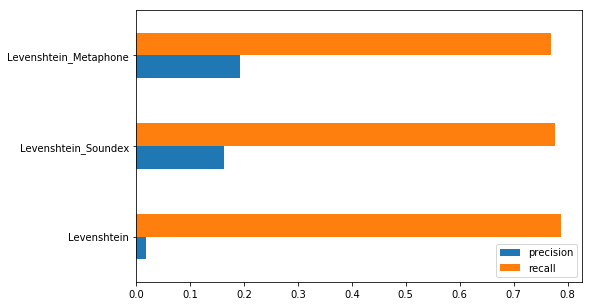

In [272]:
all_rects = all_results[['part','precision', 'recall']].plot(kind='barh', legend=True, figsize=(8, 5));
all_rects.set_yticklabels(('Levenshtein','Levenshtein_Soundex','Levenshtein_Metaphone'))
plt.show()